In [5]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import BatchNormalization,Dropout,Dense,Flatten,Conv1D
from tensorflow.keras.optimizers import Adam

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns
%matplotlib inline

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
df=pd.read_csv('~/creditcard.csv')#dataset form kaggle

In [9]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
df.shape

(284807, 31)

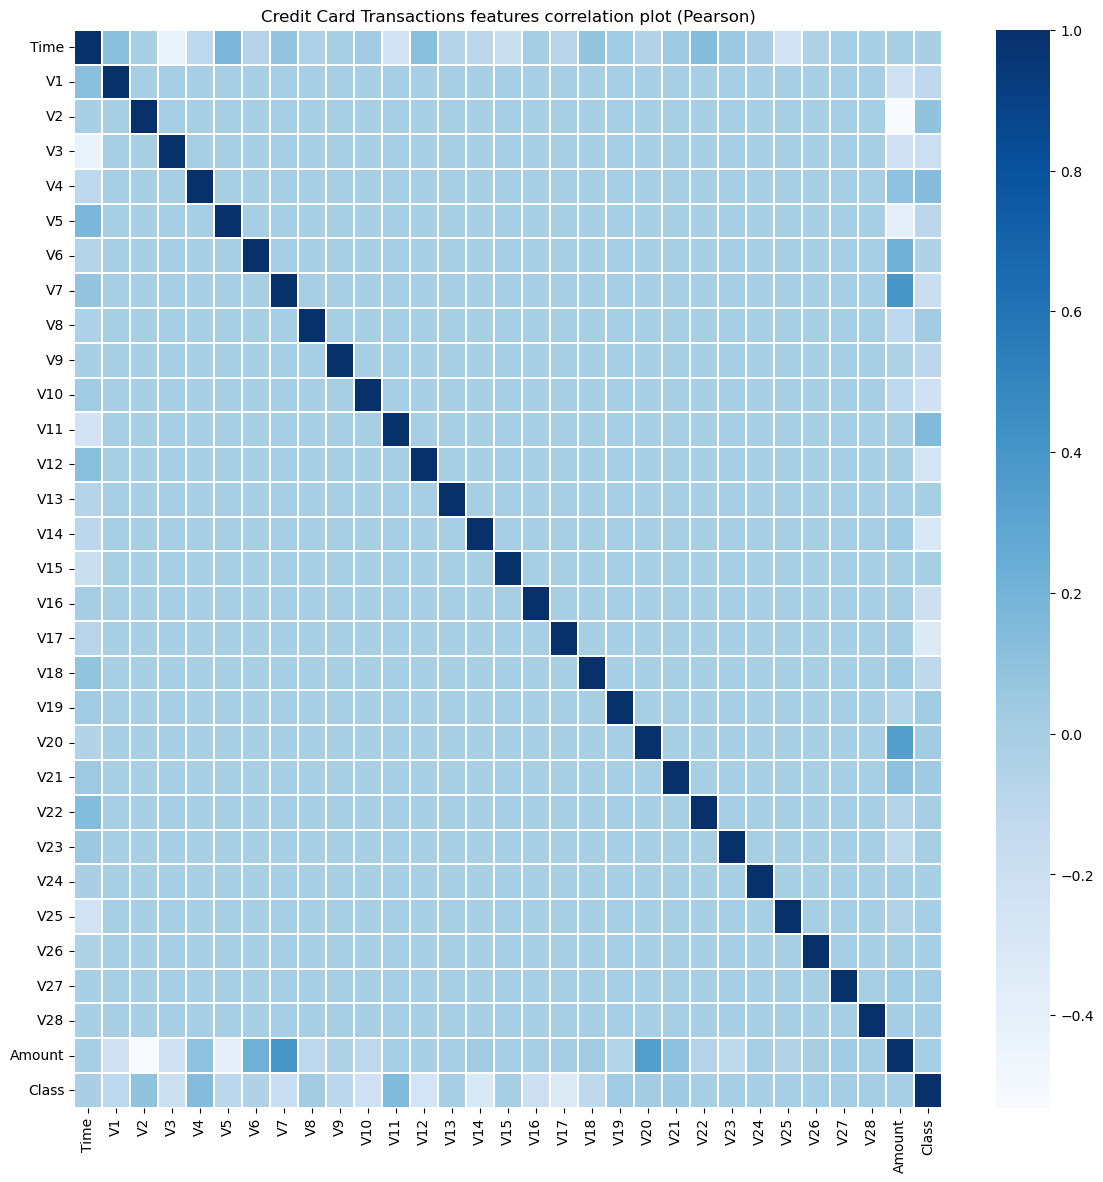

In [12]:
plt.figure(figsize = (14,14))   #Corr
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Blues")
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_21276\2137072470.py:14: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dell\AppData\Local\Temp\ipykernel_21276\2137072470.py:15: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.

<Figure size 640x480 with 0 Axes>

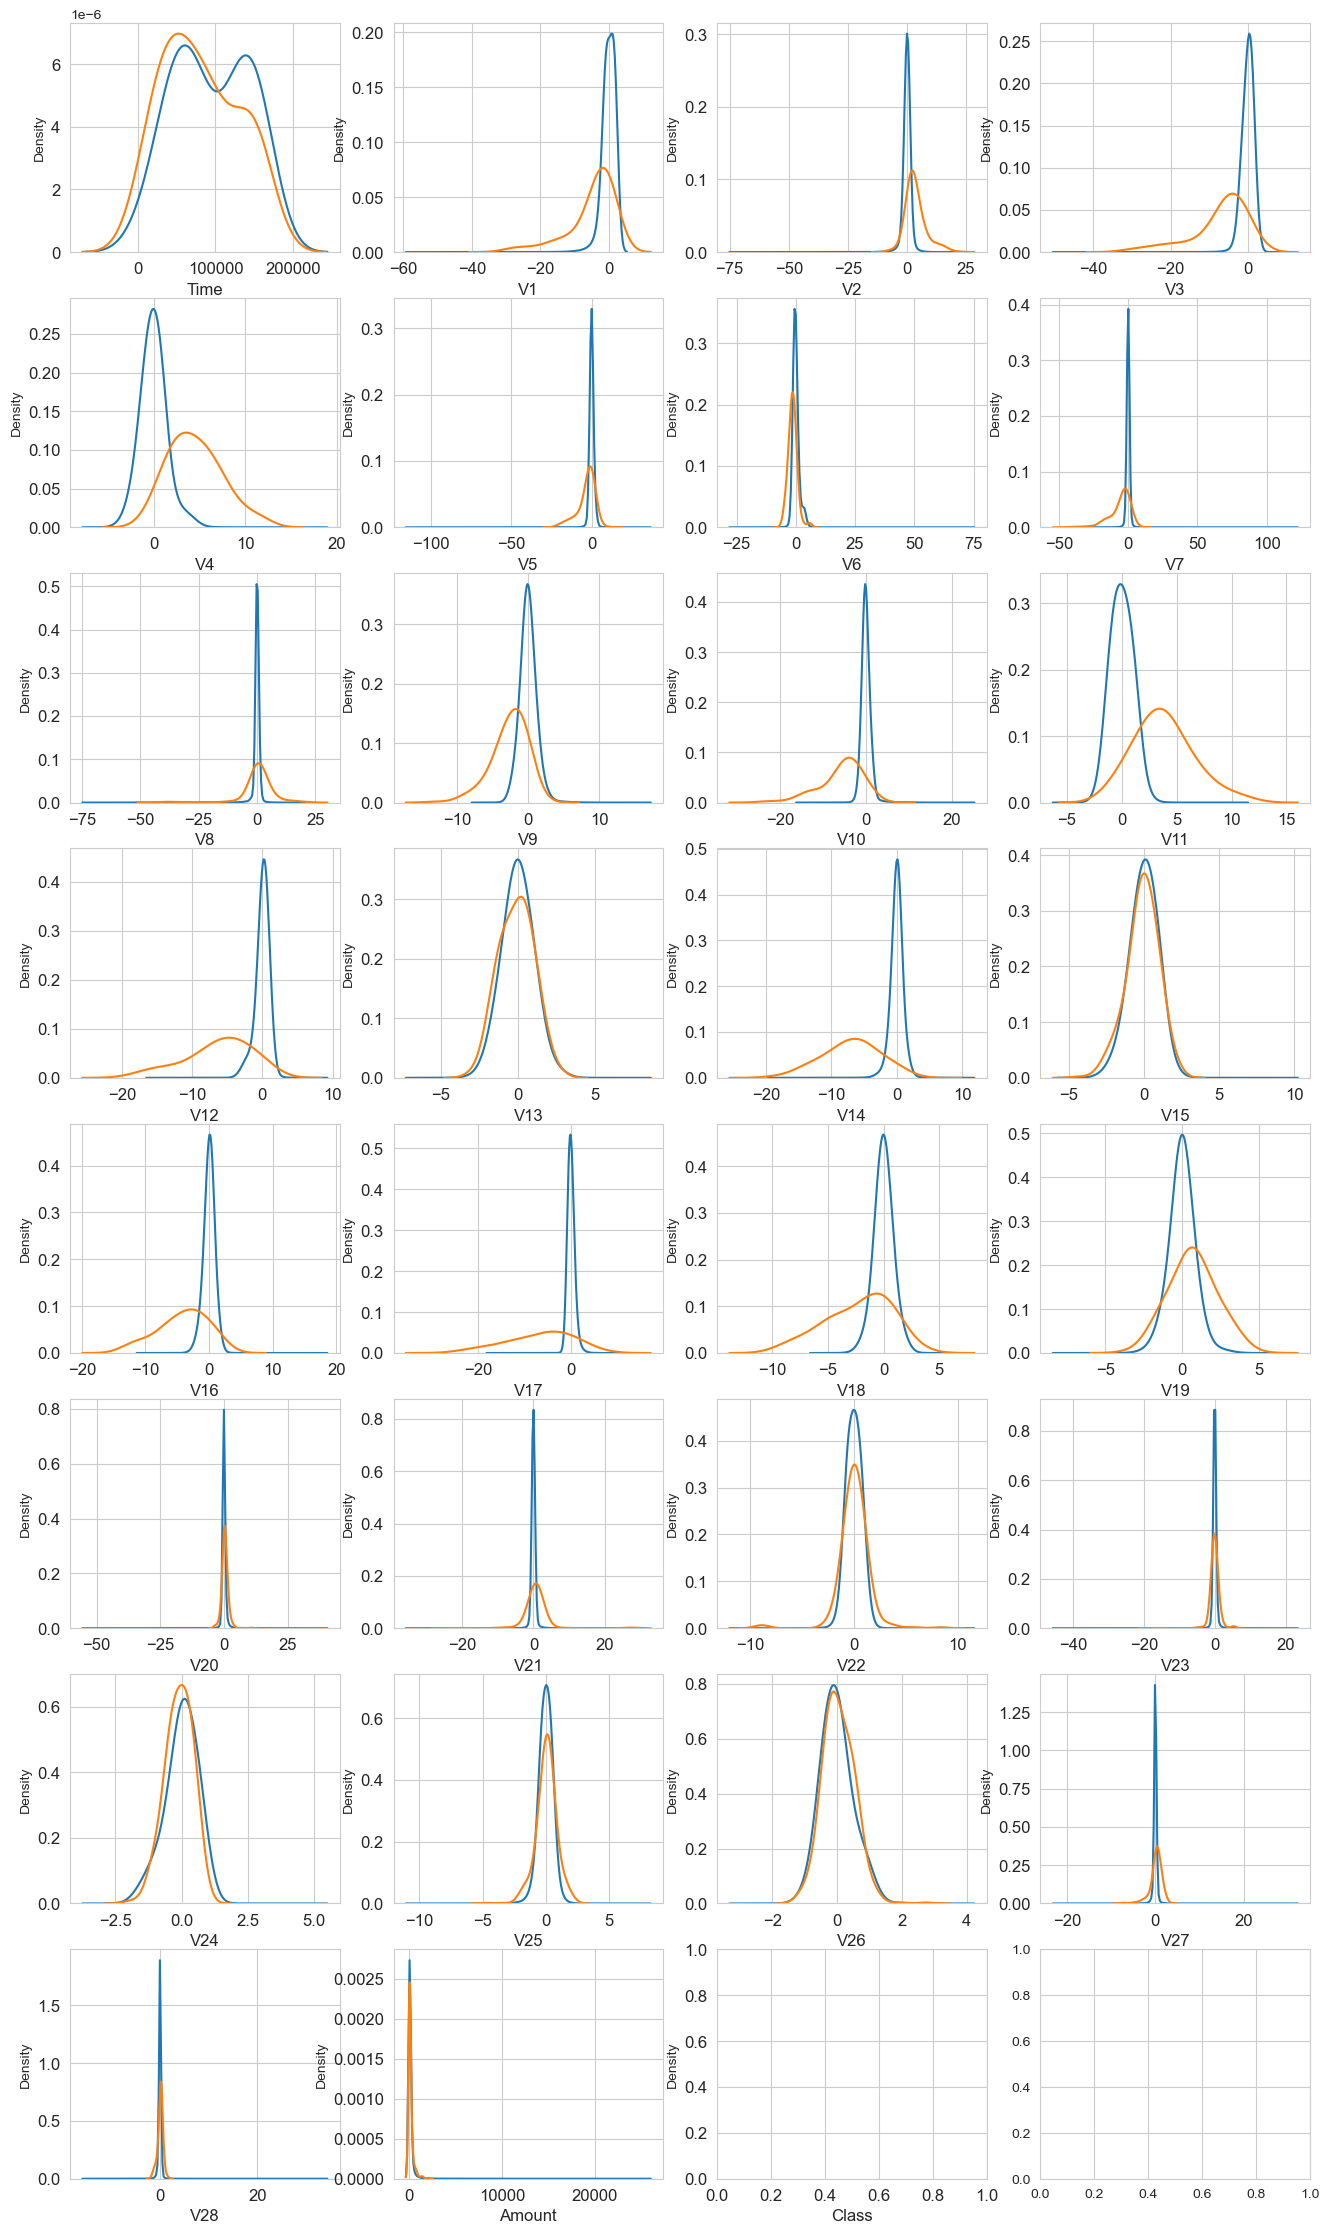

In [35]:
var = df.columns.values     #Distribution of feature 

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

In [15]:
df.Class.unique()

array([0, 1], dtype=int64)

In [16]:
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [17]:
nf = df[df.Class==0]
f = df[df.Class==1]

In [18]:
nf.shape

(284315, 31)

In [32]:
nf = nf.sample(20738)   #Sample

In [34]:
nf.shape

(20738, 31)

In [21]:
data = pd.concat([f,nf],ignore_index=True)

In [22]:
data.shape

(21230, 31)

In [23]:
X = data.drop(['Class','V15','V24','V26','Amount'],axis=1)    #drop non obviou feature
#columns_to_keep = ['V17','V12','V14','V16','V11','V10','V18','V9','V7','V4','V26']
#X = X[columns_to_keep]
y=data['Class']

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,stratify=y)

In [25]:
X_train.shape,X_test.shape

((16984, 26), (4246, 26))

In [26]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [27]:
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [28]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [30]:
X_test.shape

(4246, 26, 1)

In [436]:
model=Sequential()
model.add(Conv1D(32,3,activation='relu',input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64,2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv1D(64,2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [437]:
model.summary()

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_84 (Conv1D)                   │ (None, 24, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_84               │ (None, 24, 32)              │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_114 (Dropout)                │ (None, 24, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_85 (Conv1D)                   │ (None, 23, 64)              │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_85               │ (None, 23, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_115 (Dropout)                │ (None, 23, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_86 (Conv1D)                   │ (None, 22, 64)              │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_86               │ (None, 22, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_116 (Dropout)                │ (None, 22, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_30 (Flatten)                 │ (None, 1408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_60 (Dense)                     │ (None, 64)                  │          90,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_117 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 103,425 (404.00 KB)

 Trainable params: 103,105 (402.75 KB)

 Non-trainable params: 320 (1.25 KB)

In [438]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [439]:
history = model.fit(X_train,y_train,epochs=10,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/10
531/531 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9390 - loss: 0.1817 - val_accuracy: 0.9962 - val_loss: 0.0206
Epoch 2/10
531/531 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9941 - loss: 0.0338 - val_accuracy: 0.9951 - val_loss: 0.0211
Epoch 3/10
531/531 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9932 - loss: 0.0313 - val_accuracy: 0.9965 - val_loss: 0.0188
Epoch 4/10
531/531 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9930 - loss: 0.0326 - val_accuracy: 0.9962 - val_loss: 0.0171
Epoch 5/10
531/531 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9951 - loss: 0.0243 - val_accuracy: 0.9965 - val_loss: 0.0150
Epoch 6/10
531/531 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9943 - loss: 0.0290 - val_accuracy: 0.9967 - val_loss: 0.0153
Epoch 7/10
531/531 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9964 - loss: 0.0186 - val_accuracy: 0.9972 - val_loss: 0.0182
Epoch 8/10
531/531 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9952 - loss: 0.0222 - val_accuracy: 0.

In [440]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')  #图例放在左上角
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

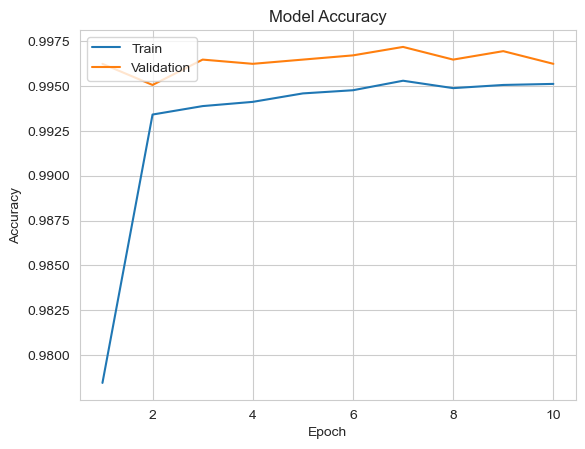

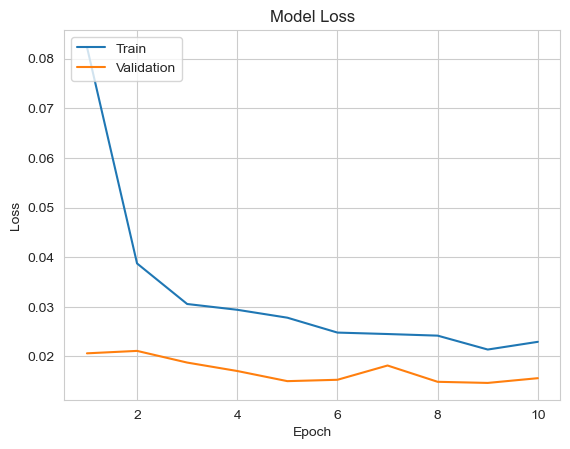

In [441]:
plotLearningCurve(history,10)